# Generate DEM Tile Index
The DEM tile index will be used both for the generation and retrieval of DEM tiles. Rather than follow the county boundaries and restricting DEM generation to the LAS file collected for a specific county, the DEM tiles are generated uniformly across the state using a regular grid. The layout of the grid is shown below for multiple projections, tile sizes, and pixel resolutions.

Because DEMs are commonally associated with hydrology and hydrologic modeling, using an equal area projection allows pixels 

In [2]:
%matplotlib inline
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [3]:
def makegrid(xmin, ymin, xmax, ymax, width=10000, height=10000):
    
    cols = list(range(int(np.floor(xmin)), int(np.ceil(xmax)), width))
    rows = list(range(int(np.floor(ymin)), int(np.ceil(ymax)), height))
    rows.reverse()
    
    polygons = []
    for x in cols:
        for y in rows:
            polygons.append(Polygon([(x, y), (x+width, y), (x+width,y+height), (x, y+height)]))
            
    return gpd.GeoDataFrame({'geometry':polygons})

def sizeof_fmt(num, suffix='B'):
    magnitude = int(np.floor(np.log(num)/np.log(1024)))
    val = num / np.power(1024, magnitude)
    if magnitude > 7:
        return '{:.1f}{}{}'.format(val, 'Y', suffix)
    return '{:3.1f}{}{}'.format(val, ['', 'K', 'M', 'G', 'T', 'P', 'E', 'Z'][magnitude], suffix)

### US National Atlas Equal Area


Grid consists of 3434 active 8192x8192 tiles.
Each tile would be 256.0MB bytes (uncompressed).
Total repository would be approximately 858.5GB.


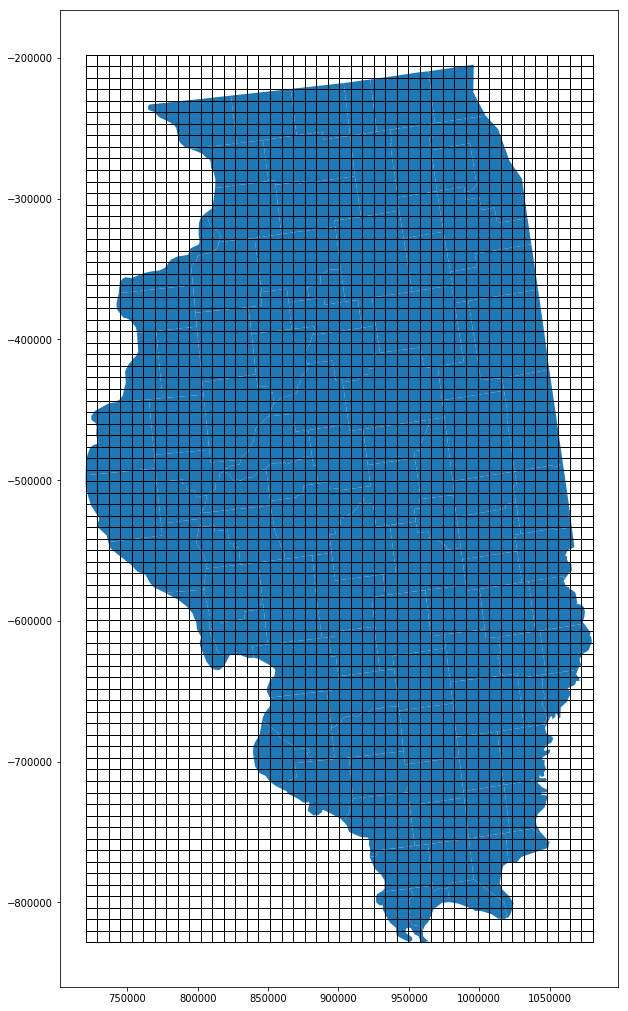

In [9]:
il = gpd.read_file('../examples/IL_Counties.gpkg').to_crs({'init': 'epsg:2163'})
width = 8192
height = 8192
res = 1 # meter

fig, ax = plt.subplots(figsize=(10,30))
il.plot(ax=ax)
tiles = makegrid(*il.total_bounds, width=width, height=height)
tiles.crs = il.crs

active = gpd.overlay(tiles, il, how='intersection')
active['area'] = active['geometry'].map(lambda x: x.area) 
print(f"Grid consists of {len(active)} active {width}x{height} tiles.")
print(f"Each tile would be {sizeof_fmt(width*height*4)} bytes (uncompressed).")
print(f"Total repository would be approximately {sizeof_fmt(len(active)*width*height*4)}.")

tiles.plot(ax=ax, facecolor='none', edgecolor='black')
plt.show()

### NAD83(HARN)/ Conus Albers (EPSG:5072)

Another equal area projection, the grid was created using a 2m per pixel resolution.

Grid consists of 1194 active 8192x8192 tiles.
Each tile would 256.0MB bytes (uncompressed).
Total repository would be approximately 298.5GB.


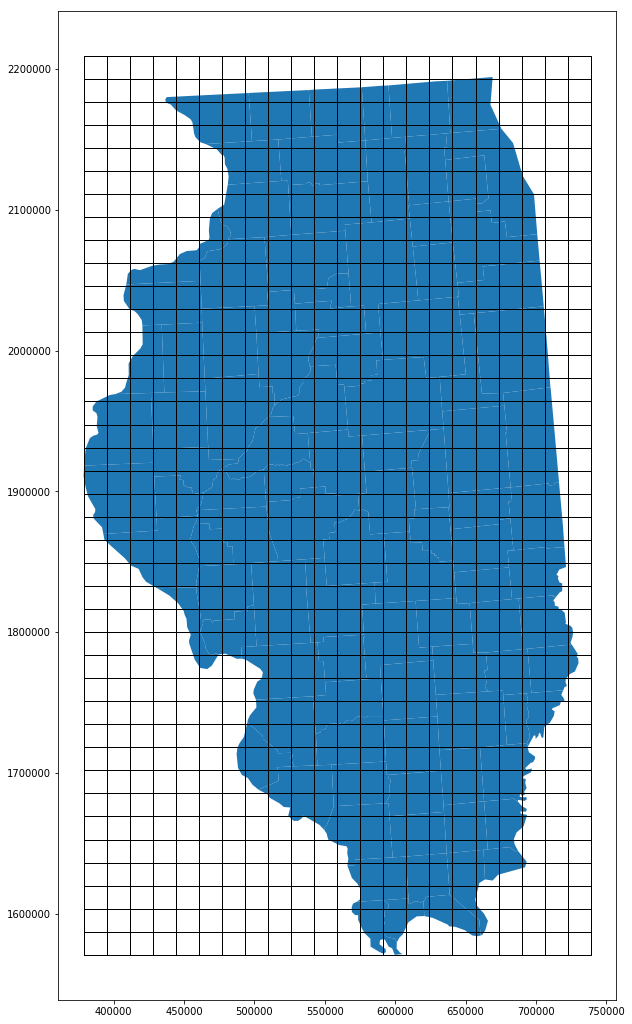

In [5]:
il = gpd.read_file('../examples/IL_Counties.gpkg').to_crs({'init': 'epsg:5072'})
width = 8192
height = 8192
res = 2 # meter
fig, ax = plt.subplots(figsize=(10,30))
il.plot(ax=ax)
tiles = makegrid(*il.total_bounds, width=width*res, height=height*res)
tiles.crs = il.crs

active = gpd.overlay(tiles, il, how='intersection')
active['area'] = active['geometry'].map(lambda x: x.area) 
print(f"Grid consists of {len(active)} active {width}x{height} tiles.")
print(f"Each tile would {sizeof_fmt(width*height*4)} bytes (uncompressed).")
print(f"Total repository would be approximately {sizeof_fmt(len(active)*width*height*4)}.")

tiles.plot(ax=ax, facecolor='none', edgecolor='black')

### Illinois State Plane East (EPSG:3435)

Grid consists of 2812 active 10000x10000 tiles.
Each tile would 381.5MB bytes (uncompressed).
Total repository would be approximately 1.0TB.


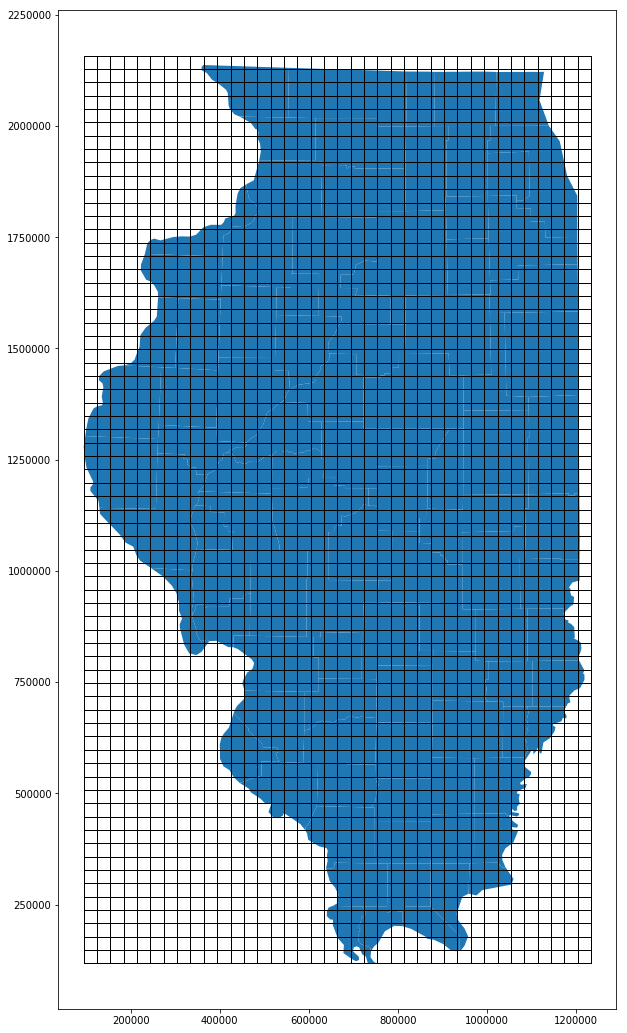

In [6]:
width = 10000 # tile width (pixels)
height = 10000 # tile height (pixels)
res=3 # feet/pixel

il = gpd.read_file('../examples/IL_Counties.gpkg').to_crs({'init': 'epsg:3435'})
fig, ax = plt.subplots(figsize=(10,30))
il.plot(ax=ax)
tiles = makegrid(*il.total_bounds, width=width*res, height=height*res)
tiles.crs = il.crs

active = gpd.overlay(tiles, il, how='intersection')
active['area'] = active['geometry'].map(lambda x: x.area) 
print(f"Grid consists of {len(active)} active {width}x{height} tiles.")
print(f"Each tile would {sizeof_fmt(width*height*4)} bytes (uncompressed).")
print(f"Total repository would be approximately {sizeof_fmt(len(active)*width*height*4)}.")

tiles.plot(ax=ax, facecolor='none', edgecolor='black')

### Illinois State Plane West (EPSG:3436)

Grid consists of 1313 active 10000x10000 tiles.
Each tile would 381.5MB bytes (uncompressed).
Total repository would be approximately 489.1GB.


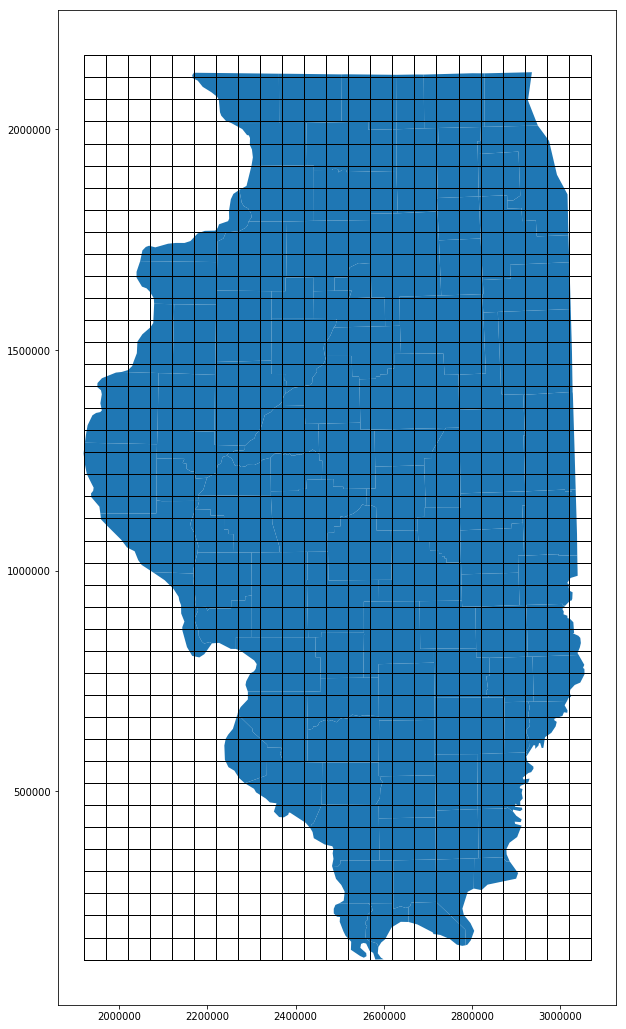

In [7]:
width = 10000 #tile size (in pixels)
height = 10000 #tile size (in pixels)
res=5 # feet/pixel

il = gpd.read_file('../examples/IL_Counties.gpkg').to_crs({'init': 'epsg:3436'})
fig, ax = plt.subplots(figsize=(10,30))
il.plot(ax=ax)
tiles = makegrid(*il.total_bounds, width=width*res, height=height*res)
tiles.crs = il.crs

active = gpd.overlay(tiles, il, how='intersection')
active['area'] = active['geometry'].map(lambda x: x.area) 
print(f"Grid consists of {len(active)} active {width}x{height} tiles.")
print(f"Each tile would {sizeof_fmt(width*height*4)} bytes (uncompressed).")
print(f"Total repository would be approximately {sizeof_fmt(len(active)*width*height*4)}.")

tiles.plot(ax=ax, facecolor='none', edgecolor='black')

### Multiple Projection Tiles
The state orthographic photo collection used a tiling system based on two state plane projections with counties being divided into east and west groups. In this case, the plot shows two grids. One based on the eastern counties and using the IL State Plane East (EPSG:3435); the other based the western counties and using IL State Plane West (EPSG:3436). An overlap of tiles can be seen running vertically through the state. This 

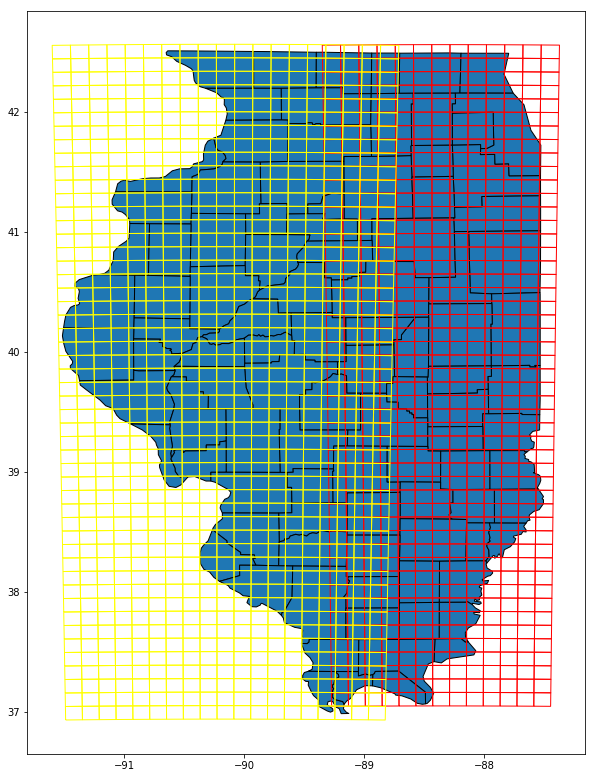

In [8]:
width = 8192
height = 8192
res = 5

il = gpd.read_file('../examples/IL_Counties.gpkg')
SPE = gpd.read_file('../examples/maps/SPE_10000.shp')
SPEgrid = makegrid(*SPE.total_bounds, width=width*res, height=height*res)
SPEgrid.crs = SPE.crs
SPW = gpd.read_file('../examples/maps/SPW_10000.shp')
SPWgrid = makegrid(*SPW.total_bounds, width=width*res, height=height*res)
SPWgrid.crs = SPW.crs

fig, ax = plt.subplots(figsize=(10,30))
il.plot(ax=ax, edgecolor='black')
SPEgrid = SPEgrid.to_crs(il.crs)
SPEgrid.plot(ax=ax, facecolor='none', edgecolor='red')
SPWgrid = SPWgrid.to_crs(il.crs)
SPWgrid.plot(ax=ax, facecolor='none', edgecolor='yellow')
